# Environment set up

### Task description: 
We assume that a round corresponds to one day. The network of customers is organized in
a graph defined by:
- a set of 30 customers;
- a set of edges connecting the customers. These edges describe the influence among the customers; we assume that only ~10% (50) of the possible edges are present;
- each edge has a possibly different activation probability;
- for each user, two binary features can be observed by the company, call them F1 and F2; customers can be of three different classes according to these features, call them C1, C2, C3; these three classes differ in terms of the reward of matching the customer with the items;
- at each round, the company can choose three seeds to activate in the social network. 

Moreover, the company has three classes of products D1, D2, and D3, and:
- for every product of type Dj and class of customer Ci, specify a reward distribution F(Dj, Ci) of matching the product “j” with the customer “i”; each reward distribution is a Gaussian distribution;
- for every product of type Dj, specify the number of units of this product; each type of product has 3 units;
- each unit of product can be matched only with one customer, and each customer can be matched with a single product.

The time horizon to use in the experiments is 365 rounds long. At each round, after the set
of seeds is selected, the information cascade and matching is repeated sufficiently many
times.

### Probability table and visualization

We initialize the set of customers C1, C2, C3, ..., C30.

In [1]:
import pandas as pd

In [2]:
customers = []
for i in range(1,31):
    user = "C"+str(i)
    customers.append(user)

customers[:5]

['C1', 'C2', 'C3', 'C4', 'C5']

We generate 50 random couples, allowing repetitions, and we assign to each couple a random sample extracted from a uniform probability distribution. The couples will represent the **edges connecting the customers**, while the samples will represent the **given activation probabilities**.

In [3]:
import random
def generate_couples(elements, num_couples):
    couples = []
    for x in range(num_couples):
        couple = random.choices(elements, k=2)
        couple.append(random.uniform(0, 1))
        couples.append(couple)
    return couples

In [4]:
edges = generate_couples(customers, 50)

In [5]:
edges[:3]

[['C6', 'C24', 0.9877353062390494],
 ['C21', 'C1', 0.9468734861339266],
 ['C4', 'C18', 0.27824189972770286]]

We initialize a **probability table**, assigning the customers both to the rows' indexes and to the columns' labels. The absence of edges between customers will be expressed by a 0. 

In [6]:
probability_table = []
probability_table.append([0]+customers)
for customer in customers:
    row = []
    row.append(customer)
    for i in range(1,31):
        row.append(0)
    probability_table.append(row)

probability_table = pd.DataFrame(probability_table)

In [7]:
probability_table.set_index(0, inplace = True)
probability_table = probability_table.set_axis(probability_table.iloc[0], axis=1)
probability_table = probability_table[1:]

In [8]:
probability_table.head(2)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,,,,,,,,,,,,,,,,,,,,,
C1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
for edge in edges:
    probability_table.at[edge[0],edge[1]] = edge[2]
    

In [10]:
probability_table

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,,,,,,,,,,,,,,,,,,,,,
C1,0,0,0,0,0,0,0,0,0,0,...,0,0.647275,0,0,0,0,0,0,0,0
C2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.893894
C6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.987735,0,0,0,0,0,0
C7,0,0.002485,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.882812,0,0,0,0
C8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It is possible to build and visualize the influence **graph** as shown below:

In [11]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

Here we do not display the edges' weighs. 

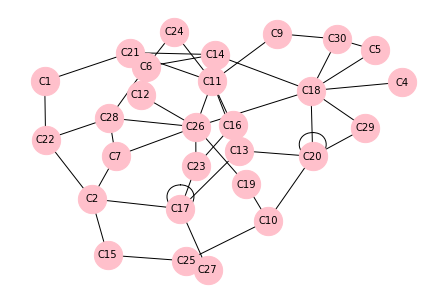

In [12]:
links = []
for edge in edges:
    links.append(edge[0:2])
    
graph = nx.Graph()
graph.add_edges_from(links)


# Draw the graph
nx.draw(graph, with_labels=True, node_color='pink', node_size=800, font_size=10, edge_color='black',width=1)


# Display the graph
plt.show()
plt.rcParams['figure.figsize'] = [12, 12]


The following graph will instead display the weighs.

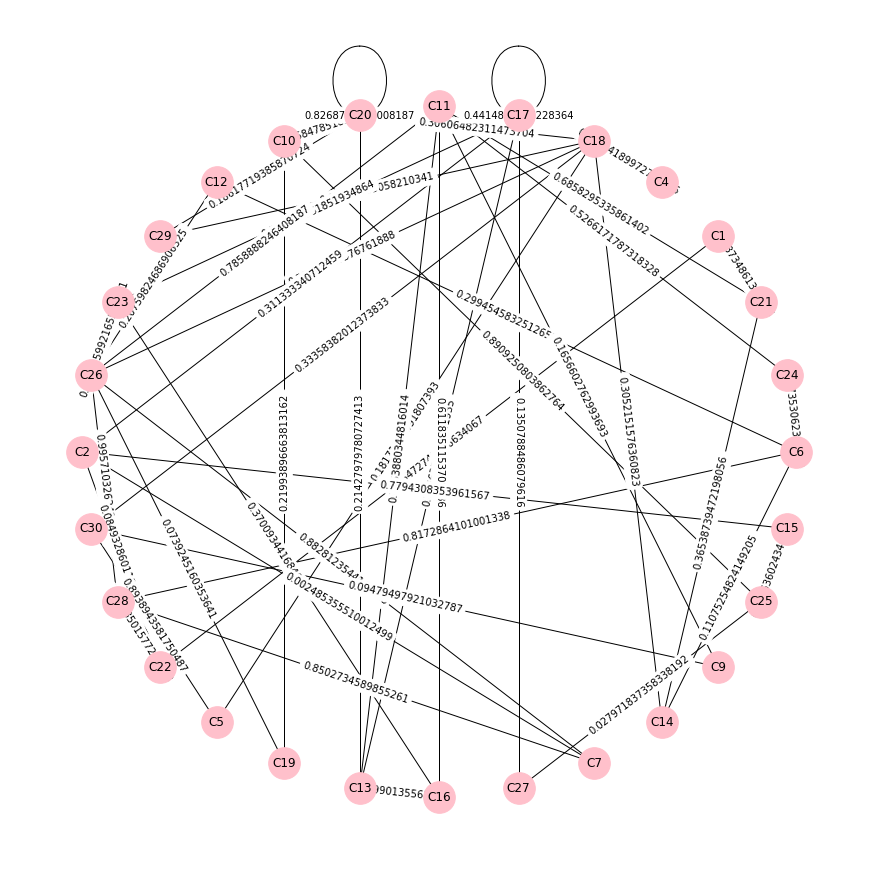

In [13]:
G = nx.Graph()

# Add edges from the DataFrame
G.add_weighted_edges_from(edges)

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='pink', node_size=1000, font_size=12, edge_color='black')

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


plt.axis("off")
plt.show()
plt.rcParams['figure.figsize'] = [12, 12]



### Features assignment and Classes

Assuming that the articles we are studying are alcoholic and non alcoholic beverages, we define the following features: 
- **Gender** (Male = 0, Female = 1)
- **Age** (Adults = 1, Elderly people = 0)

The three classes are: 
- **Class 1 "Adult_Male"** - Male adults. 
- **Class 2 "Adult_Female"** - Female adults. 
- **Class 3 "Other"** - Elderly people.



In [14]:
features = ["Customer","Gender","Age"]

features_table = []
features_table.append(features)

for customer in customers:
    row = []
    
    row.append(customer)
    
    row.append(random.choice((0,1)))
    row.append(random.choice((0,1)))
    
    features_table.append(row)

In [15]:
features_table[:5]


[['Customer', 'Gender', 'Age'],
 ['C1', 1, 0],
 ['C2', 0, 1],
 ['C3', 1, 1],
 ['C4', 1, 0]]

In [16]:
features_table = pd.DataFrame(features_table)

In [17]:
features_table = features_table.set_axis(features_table.iloc[0], axis=1)
features_table = features_table[1:]

In [18]:
features_table.head(5)

,Customer,Gender,Age
1,C1,1,0
2,C2,0,1
3,C3,1,1
4,C4,1,0
5,C5,1,1


In [19]:
class1 = []
class2 = []
class3 = []
class_column = []

for row in range(-1,len(features_table)):
    if features_table.iloc[row]["Age"] == 1:
        if features_table.iloc[row]["Gender"] == 0:
            class_column.append("Adult_Male")
            class1.append(features_table.iloc[row]["Customer"])
        elif features_table.iloc[row]["Gender"] == 1:
            class_column.append("Adult_Female")
            class2.append(features_table.iloc[row]["Customer"])
    else:
        class3.append(features_table.iloc[row]["Customer"])
        class_column.append("Other")

class_column = pd.Series(class_column)
features_table['Class'] = class_column


In [20]:
features_table.head(10)

,Customer,Gender,Age,Class
1,C1,1,0,Other
2,C2,0,1,Adult_Male
3,C3,1,1,Adult_Female
4,C4,1,0,Other
5,C5,1,1,Adult_Female
6,C6,1,0,Other
7,C7,1,1,Adult_Female
8,C8,0,0,Other
9,C9,0,1,Adult_Male
10,C10,0,0,Other


It is possible to visualize the distribution:

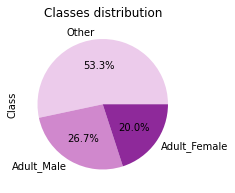

In [21]:
class_frequency = features_table['Class'].value_counts()
custom_colors = ["#eccbeb", "#d088cd", "#8e299a"]

class_frequency.plot.pie(labels=features_table['Class'], autopct='%1.1f%%', colors=custom_colors, figsize=(3, 3))

# Set the title of the pie chart
plt.title('Classes distribution')

# Display the pie chart
plt.show()


### Classes of Products and reward distributions

Three classes of product are given **D1, D2, D3**. Where: 
- D1 = Pina colada 
- D2 = Whiskey Sour
- D3 = Non-alcoholic drink

For every class of products and class of customer, we specify a reward distribution F(Dj, Ci) of matching the product “j” with the customer “i”.  

In [22]:
customer_classes = list(features_table['Class'].unique())
product_classes = ["Pina_Colada","Whiskey_Sour","Non-alcoholic_Drink"]

combos = []

for c in customer_classes:
    for i in product_classes:
        combos.append([c,i])
combos = pd.DataFrame(combos)
combos.columns = ["Customer_Class","Product"]

means = [4,7,2,3,1,8,9,3,5]
std_dev = [2,1,3,2,1,3,1,3,1]
combos["Mean"] = means
combos["Std_dev"] = std_dev

combos

,Customer_Class,Product,Mean,Std_dev
0,Other,Pina_Colada,4,2
1,Other,Whiskey_Sour,7,1
2,Other,Non-alcoholic_Drink,2,3
3,Adult_Male,Pina_Colada,3,2
4,Adult_Male,Whiskey_Sour,1,1
5,Adult_Male,Non-alcoholic_Drink,8,3
6,Adult_Female,Pina_Colada,9,1
7,Adult_Female,Whiskey_Sour,3,3
8,Adult_Female,Non-alcoholic_Drink,5,1


We can now display the distributions.

In [25]:
from scipy.stats import truncnorm

def reward_distribution(Dj, Ci, mean, std_dev, num_samples=365, plot=False):
    # Generate multiple random numbers from a truncated Gaussian distribution within the range 0, 10
    a, b = (0 - mean) / std_dev, (10 - mean) / std_dev
    rewards = truncnorm.rvs(a, b, loc=mean, scale=std_dev, size=num_samples)

    if plot:
        # Plot the reward distribution
        fig, ax = plt.subplots(figsize=(6, 4))
        plt.hist(rewards, bins='auto', alpha=0.7, rwidth=0.85, color = "pink")
        plt.title("Reward Distribution for {} and {}".format(Dj, Ci))
        plt.xlabel("Reward Value")
        plt.ylabel("Frequency")
        plt.grid(axis='y')
        plt.show()
        
    else: 
        return np.random.choice(rewards)


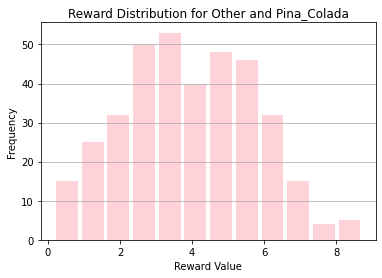

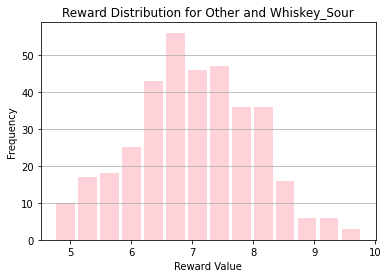

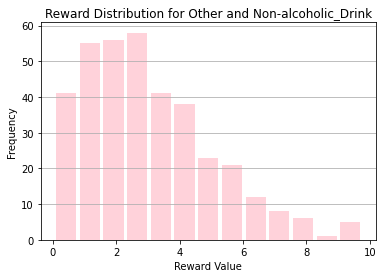

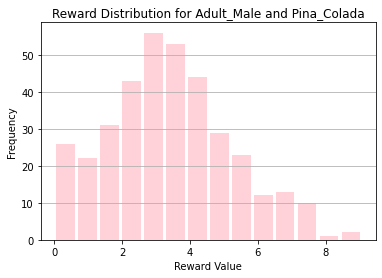

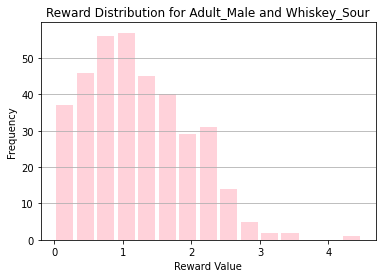

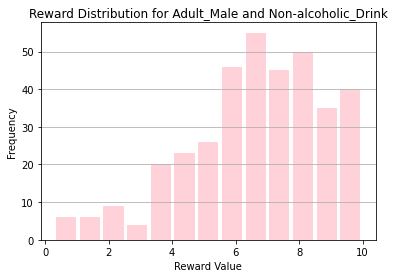

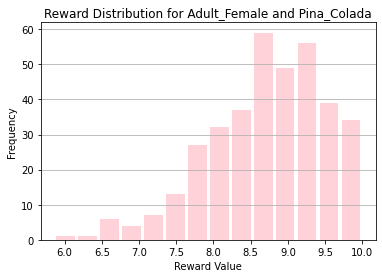

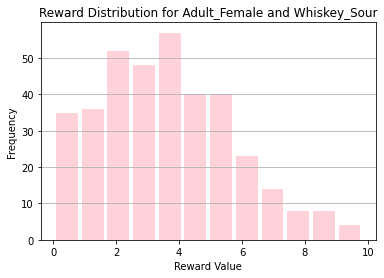

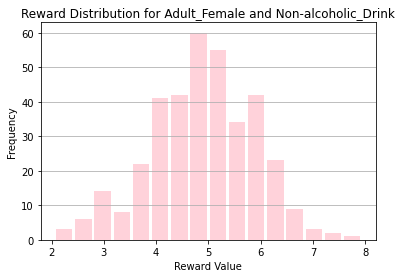

In [26]:
for index in range(0,len(combos)):
    Dj = combos["Customer_Class"][index]
    Cj = combos["Product"][index]
    mean = combos["Mean"][index]
    std_dev = combos["Std_dev"][index]
    reward_distribution(Dj, Cj, mean, std_dev, plot = True)

In [ ]:
"""
for every product of type Dj, specify the number of units of this product; each type of product has 3 units;
each unit of product can be matched only with one customer, and each customer can be matched with a single product.
The time horizon to use in the experiments is 365 rounds long. At each round, after the set of seeds is selected, the information cascade and matching is repeated sufficiently many times."""

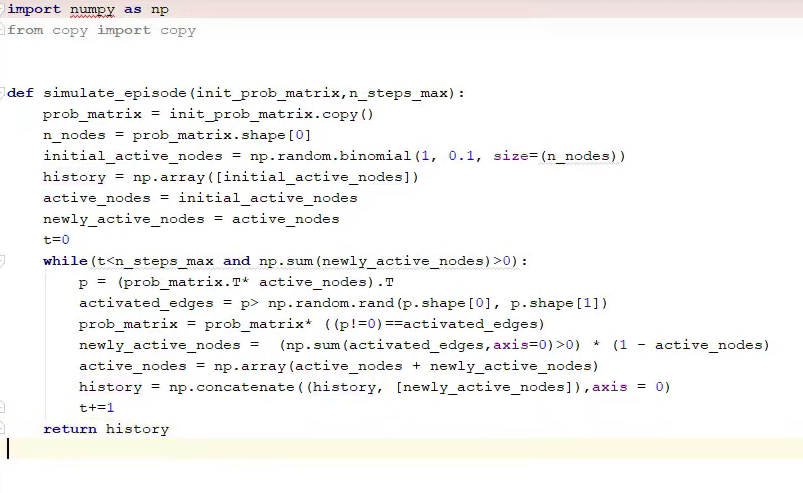

In [31]:
import numpy as np
def simulate_episode(init_prob_matrix, n_steps_max):
    prob_matrix = init_prob_matrix
    n_nodes = prob_matrix.shape[0]
    initial_active_nodes = np.random.binomial(1, 0.1, size=n_nodes)
    history = np.array([initial_active_nodes])
    active_nodes = initial_active_nodes
    newly_active_nodes = active_nodes
    t = 0
    
    while (t<n_steps_max and np.sum(newly_active_nodes)>0):
        p = (prob_matrix.T* active_nodes).T
        activated_edges = p>np.random.rand(p.shape[0],p.shape[1])
        prob_matrix = prob_matrix* ((p!=0)==activated_edges)
        newly_active_nodes = (np.sum(activated_edges, axis = 0)>0) * (1-active_nodes)
        active_nodes = np.array(active_nodes + newly_active_nodes)
        history = np.concatenate((history, [newly_active_nodes]), axis=0)
        t = t+1
    return history

array([[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]])